# Practical task: Yelisiev Vladylsav KA-01mp

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from scripts.utils import plot_ts, plot_ts_hist, get_stat_overview, compute_pacf_acf

from statsmodels.tsa.seasonal import seasonal_decompose


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data exploration

The dataset we use is data of closing prices for NFLX from NASDAQ from start of 2020 till today:

In [23]:
df =  pd.read_csv("data/NFLX.csv").set_index('Date')["Close"]

In [24]:
df.head(), df.tail()

(Date
 2020-01-02    329.809998
 2020-01-03    325.899994
 2020-01-06    335.829987
 2020-01-07    330.750000
 2020-01-08    339.260010
 Name: Close, dtype: float64,
 Date
 2021-02-12    556.520020
 2021-02-16    557.280029
 2021-02-17    551.340027
 2021-02-18    548.219971
 2021-02-19    540.219971
 Name: Close, dtype: float64)

Let's viualize this series and plot it's histogram to get some insights on data structure:

In [25]:
plot_ts(df)

In [26]:
plot_ts_hist(df, bins=15, rug = True)

In [27]:
stats = pd.DataFrame(get_stat_overview(df))
stats.columns = ["Value:"]
stats.T

,Mean,Median,Max,Min,Std,Skewness,Kurtosis,Jarque_Bera,Jarque_Bera_p
Value:,457.231328,481.559998,586.340027,298.839996,68.656388,-0.450957,-0.931513,20.036945,0.000045


## Stationarity test

### Augmented Dickey-Fuller test
The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.  
  
If the null hypothesis in failed to be rejected, this test may provide evidence that the series is non-stationary.



> p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.  
> p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

  
    
### KPSS test
KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).

In [28]:
from statsmodels.tsa.stattools import adfuller, kpss
from scripts.utils import inference_statinarity

In [29]:
statio = {}
statio.update(inference_statinarity(df))
statio.update(inference_statinarity(df, "kpss",3))
pd.DataFrame(statio)

C:\Users\User\anaconda3\envs\iasa\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

C:\Users\User\anaconda3\envs\iasa\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




,adfuller,kpss
statistic,-1.739766,1.58953
p_value,0.410749,0.01000
critical_value_1%,-3.453838,0.73900
critical_value_5%,-2.871881,0.46300
critical_value_10%,-2.572280,0.34700
critical_value_2.5%,NaN,0.57400


Based upon the significance level of 0.05 and the p-values there is an evidence of series being non-stationary per both ADF and KPSS tests.

## Trend-seasonal decomposition
`period=5` for weekly  
`period=20 #21` for monthly 


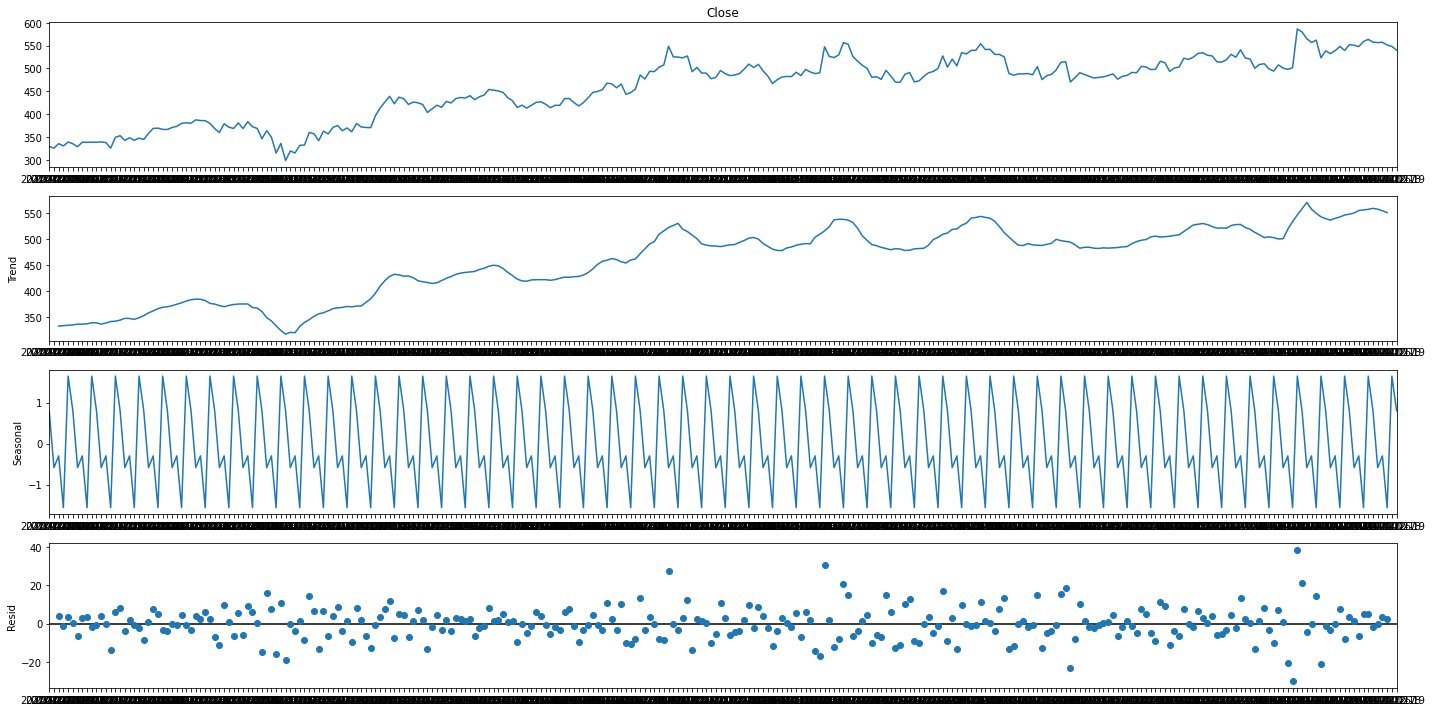

In [30]:
plt.rcParams.update({'figure.figsize': (20,10)})
sesonal_dec = seasonal_decompose(df, period=5)
sesonal_dec.plot()
plt.show()

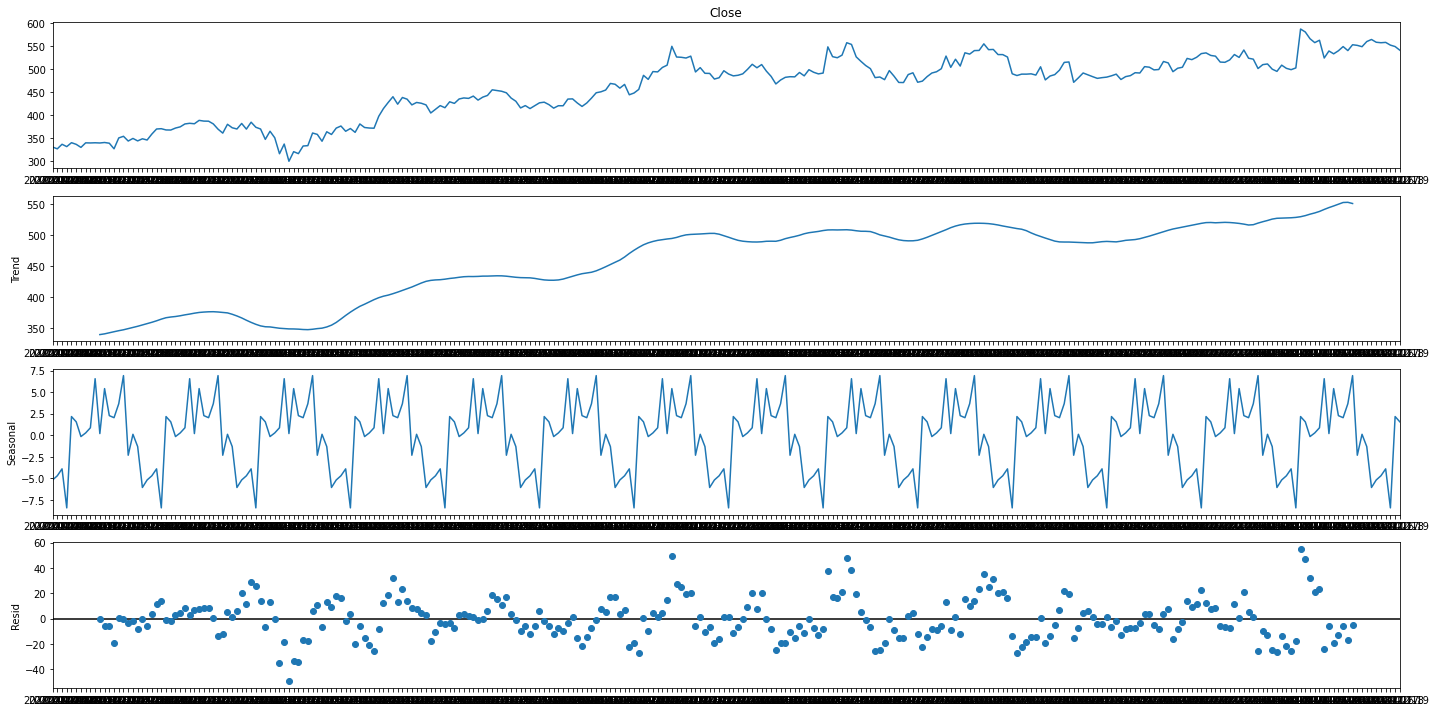

In [31]:
sesonal_dec = seasonal_decompose(df, period=20)
sesonal_dec.plot()
plt.show()

In [32]:
plot_ts(df.diff(1).dropna())

In [33]:
statio = {}
statio.update(inference_statinarity(df.diff(1).dropna()))
statio.update(inference_statinarity(df.diff(1).dropna(), "kpss",3))
pd.DataFrame(statio)

C:\Users\User\anaconda3\envs\iasa\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

C:\Users\User\anaconda3\envs\iasa\lib\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




,adfuller,kpss
statistic,-8.117316e+00,0.063648
p_value,1.181416e-12,0.100000
critical_value_1%,-3.453838e+00,0.739000
critical_value_5%,-2.871881e+00,0.463000
critical_value_10%,-2.572280e+00,0.347000
critical_value_2.5%,NaN,0.574000


C:\Users\User\anaconda3\envs\iasa\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

C:\Users\User\anaconda3\envs\iasa\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.

C:\Users\User\anaconda3\envs\iasa\lib\site-packages\statsmodels\tsa\stattools.py:1029: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.



(array([ 1.        , -0.21161583,  0.04953599, -0.0941874 ,  0.15550695,
        -0.11966384, -0.04428233, -0.01754263, -0.03031193, -0.00388779,
        -0.06020454, -0.08409694,  0.06216457, -0.03518225,  0.1116439 ,
        -0.15961061,  0.12489138, -0.03507086,  0.07266084, -0.13730369,
        -0.02407934,  0.06173597, -0.04950454,  0.01789253, -0.07149488,
         0.0457031 , -0.05496141, -0.03229952, -0.09741598,  0.09825045,
        -0.0048244 , -0.00171636,  0.02496891,  0.13989982, -0.0652227 ,
         0.02653845, -0.11380917,  0.09845536,  0.01119042,  0.00878402,
        -0.0115472 ]),
 array([ 1.        , -0.21236095,  0.00501505, -0.08753327,  0.12635901,
        -0.06599775, -0.09866098, -0.02492032, -0.07462579, -0.00986947,
        -0.06132687, -0.1417633 ,  0.02608792, -0.04500084,  0.1019131 ,
        -0.1232316 ,  0.02443571,  0.00740137,  0.0143473 , -0.08709342,
        -0.12697591,  0.03330322, -0.05669619,  0.01897231, -0.06416901,
        -0.03714196, -0.0714

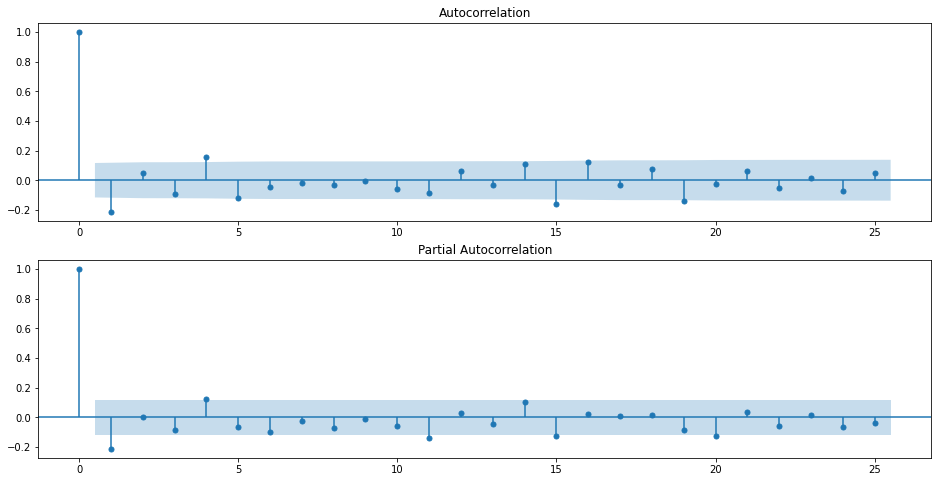

In [34]:
compute_pacf_acf(df.diff(1).dropna())

Based on tests, looks like the first difference of this series is statinary, thus it has no trend.

## Train/Validation

In [35]:
train = df.loc[df.index<'2021-02-15']
test = df.loc[df.index>='2021-02-15']

In [36]:
plot_ts(train)

## AR

In [37]:
from sklearn.metrics import mean_squared_error
from scripts.models import ARMA

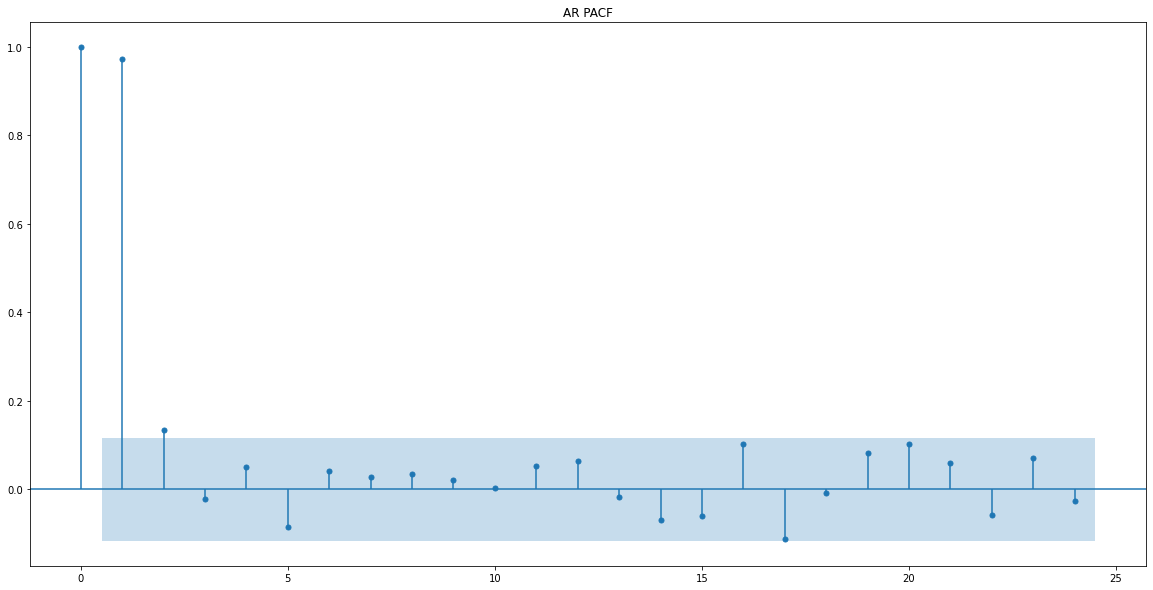

In [38]:
arma_estimator = ARMA(resid=True, window = 0, nlags = 24, ewm=False, ma_threshold=0.2, ar_threshold=0.1)
pred, target = arma_estimator.predict(train)

In [39]:
from scripts.metrics import get_all_metrics

In [40]:
print('Equation coefficients:'+str(arma_estimator.only_ar_coefs))
get_all_metrics(target, pred, len(arma_estimator.only_ar_coefs), 'ar')

Equation coefficients:[9.747470699174585, 0.8169984179354545, 0.1480571537281209, -0.044925321734351015, 0.1655868303664797, -0.2152250655549013, 0.029383745806400734, 0.053959842162501555, -0.06177111730103627, 0.0843051776865996, -0.11050973435243805, 0.011871398886921531, 0.11785750915835227, -0.05205005108858308, 0.12032690241751129, -0.18835637806865024, 0.12366466699198737, -0.003403221080609371, -0.01945949669106321, -0.09196245375339379, 0.09771712200707038]


,AIC,RMSE,Durbin-Watson,R-squared,Schwarz criteria,SSE,Adjusted R-sq,Log Likelihood,Mean dependent var,Std dependent var
Value:,8.095644,13.336500,2.020924,0.920310,8.381657,42864.800122,0.833580,-1039.529386,0.000000,12.790860


## ARMA

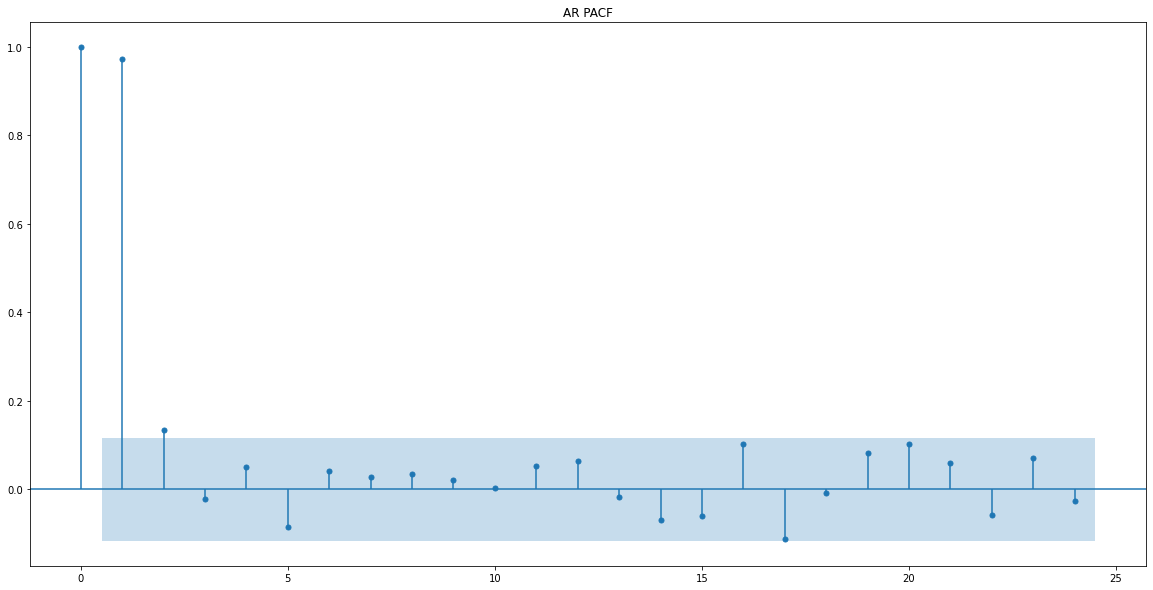

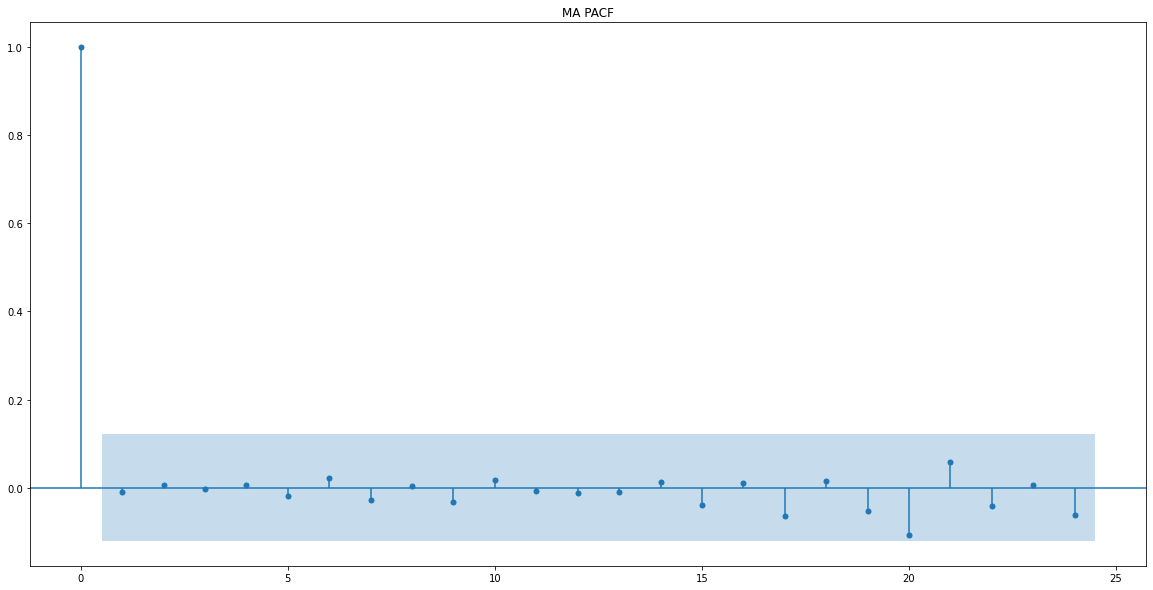

In [41]:
arma_estimator = ARMA(resid=True, window = 5, nlags = 24, ewm=False, ma_threshold=0.1, ar_threshold=0.1)
pred, target = arma_estimator.predict(train)

In [42]:
print('Equation coefficients:'+str(arma_estimator.arma_coefs))
get_all_metrics(target, pred, len(arma_estimator.arma_coefs), 'arma')

Equation coefficients:[-4.935365222915152, 1.535154164305676, -0.037393590667752774, 1.2589463456796135, -1.2535673156235287, -1.61113237895068, 0.29831082907064893, 0.21083542654749513, 0.3691867962161487, 1.7866633400531438, -0.6077997397669658, -1.0990451384806113, -0.18347663386966576, -1.1738036198434303, 0.3322283135228613, 1.3768337853742243, 0.33612324608904454, 0.20366186201585781, -0.5189339014659897, -0.7517085885534271, 0.5395034704386118, 1, -4.583525340709314, 1.5219782796781665, -6.565383221428423, 8.450500496525212, 6.1955946535391835, -5.9280727354990175, -0.36878002916619523, -7.360066897328085, 0.6131930016099569, 9.121339947355882, -0.4178691277541235, 0.17140903474982846, -2.5663839992179343, -0.4404525563745288, 0.21466991847844707, -0.14880213967403094, -0.9451537880214685, 1.6015512508130232, 0.5396856352050382, -1.4582530579291753]


,AIC,RMSE,Durbin-Watson,R-squared,Schwarz criteria,SSE,Adjusted R-sq,Log Likelihood,Mean dependent var,Std dependent var
Value:,12.529668,117.507584,0.011944,0.050722,13.142422,2706374.338804,-0.212258,-1449.030490,91.237344,55.316586
